## 1. Iris 데이터셋을 활용해 클래스별 변수 평균 차이를 검정

### 1.데이터 로드 & 구조 확인

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')

Matplotlib is building the font cache; this may take a moment.


In [18]:
print(iris.head())
iris.info()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 2.기술통계량 산출

In [26]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [269]:
species = iris['species'].unique().tolist()
for item in species:
    print(item)
    print(iris[iris['species']==item]['petal_length'].describe(),'\n')

setosa
count    50.000000
mean      1.462000
std       0.173664
min       1.000000
25%       1.400000
50%       1.500000
75%       1.575000
max       1.900000
Name: petal_length, dtype: float64 

versicolor
count    50.000000
mean      4.260000
std       0.469911
min       3.000000
25%       4.000000
50%       4.350000
75%       4.600000
max       5.100000
Name: petal_length, dtype: float64 

virginica
count    50.000000
mean      5.552000
std       0.551895
min       4.500000
25%       5.100000
50%       5.550000
75%       5.875000
max       6.900000
Name: petal_length, dtype: float64 



### 3.시각화

<Axes: xlabel='species', ylabel='petal_length'>

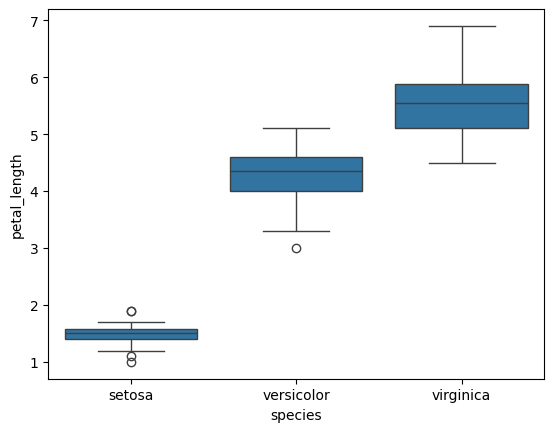

In [78]:
sns.boxplot(x='species', y='petal_length', data=iris)

setosa, versicolor, virginica 순으로 petal_length의 평균이 높아진다  
setosa와 versicolor에서 이상치가 보인다

### 4.정규성 검정

In [314]:
from scipy.stats import shapiro, levene, f_oneway

# H0: 데이터가 정규분포를 따른다.
# H1: 데이터가 정규분포를 따르지 않는다.

for species in iris['species'].unique():
    stat, p = shapiro(iris[iris['species'] == species]['petal_length'])
    print(f"{species}: p-value = {p} --> {'정규성 만족' if p > 0.05 else '정규성 불만족'}")

setosa: p-value = 0.05481146719553462 --> 정규성 만족
versicolor: p-value = 0.15847783815657573 --> 정규성 만족
virginica: p-value = 0.10977536903223795 --> 정규성 만족


### 5.등분산성 검정

In [317]:
# H0: 세 그룹의 분산이 같다.
# H1: 세 그룹의 분산이 다르다.

setosa_petal_l = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_l = iris[iris['species'] == 'versicolor']['petal_length']
virginica_petal_l = iris[iris['species'] == 'virginica']['petal_length']

stat, p = levene(setosa_petal_l, versicolor_petal_l, virginica_petal_l)
print(f"p-value = {p} --> {'등분산성 만족' if p > 0.05 else '등분산성 불만족'}")
print('세 그룹의 분산이 다르다.')

p-value = 3.1287566394085344e-08 --> 등분산성 불만족
세 그룹의 분산이 다르다.


### 6.가설 수립

ANOVA 검정 수립  
H0: 3개 Species 간 Petal Length의 평균이 모두 같다.  
H1: 적어도 한 쌍의 Species 간 평균은 다르다.  

### 7.ANOVA 실행

In [323]:
stat, p = f_oneway(setosa_petal_l, versicolor_petal_l, virginica_petal_l)
print(f"F = {stat}, p-value = {p} --> {'귀무가설 기각' if p < 0.05 else '귀무가설 채택'}")
print('적어도 한 쌍의 Species 간 평균은 다르다.')

F = 1180.161182252981, p-value = 2.8567766109615584e-91 --> 귀무가설 기각
적어도 한 쌍의 Species 간 평균은 다르다.


In [327]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)
print(tukey.summary())
print('3개 Species 간 Petal Length의 평균이 모두 다르다. \n즉, 세 쌍 모두 간에 유의미한 차이가 존재함')

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------
3개 Species 간 Petal Length의 평균이 모두 다르다. 
즉, 세 쌍 모두 간에 유의미한 차이가 존재함


### 9.결과 요약

ANOVA와 사후검정을 통해 세 그룹의 평균이 모두 다르다는 것을 알 수 있다. 또한, 등분산성 검정을 통해 세 그룹의 분산도 모두 다르다는 것을 알 수 있다. 세 그룹은 petal length 값에서 통계적으로 유의미한 차이를 갖고 있다. Boxplot을 보면 setosa의 petal_length값이 통계적으로 유의하게 짧으며 virginica의 petal_length값이 통계적으로 유의하게 길다.

## 2.실제 신용카드 사기 데이터셋을 활용해 클래스 불균형 상황에서 분류 모델을 학습

In [200]:
import pandas as pd

credit = pd.read_csv("creditcard.csv")

In [202]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [204]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [206]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [214]:
print(credit['Class'].value_counts(), credit['Class'].value_counts(normalize=True))

Class
0    284315
1       492
Name: count, dtype: int64 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


### 2. 샘플링

In [218]:
fraud = credit[credit['Class']==1]
normal = credit[credit['Class']==0].sample(n=10_000, random_state=42)
credit_sampled = pd.concat([fraud, normal])

print(credit_sampled['Class'].value_counts(normalize=True))

Class
0    0.953107
1    0.046893
Name: proportion, dtype: float64


### 3.데이터 전처리

In [220]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
credit_sampled['Amount_Scaled'] = scaler.fit_transform(credit_sampled[['Amount']])

credit_sampled.drop(columns='Amount', inplace=True)

In [222]:
X = credit_sampled.drop(columns='Class')
y = credit_sampled['Class']

### 4.학습 데이터와 테스트 데이터 분할

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, stratify=y, random_state=42)

In [226]:
print("\n[Train Class 비율]")
print(y_train.value_counts(normalize=True))
print("\n[Test Class 비율]")
print(y_test.value_counts(normalize=True))


[Train Class 비율]
Class
0    0.953056
1    0.046944
Name: proportion, dtype: float64

[Test Class 비율]
Class
0    0.953311
1    0.046689
Name: proportion, dtype: float64


### 5.SMOTE 적용

In [243]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
print(f"SMOTE 적용 전의 사기 거래 건수: {y_train[y_train==1].value_counts()}")
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"SMOTE 적용 후의 사기 거래 건수: {y_train_smote[y_train_smote==1].value_counts()}")

SMOTE 적용 전의 사기 거래 건수: Class
1    394
Name: count, dtype: int64
SMOTE 적용 후의 사기 거래 건수: Class
1    7999
Name: count, dtype: int64


### 6.모델 학습

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [250]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [258]:
print(y_pred)
print(y_pred_proba)

[0 0 0 ... 0 0 0]
[0.02 0.   0.03 ... 0.   0.   0.01]


In [260]:
print(classification_report(y_test, y_pred))

pr_auc = average_precision_score(y_test, y_pred_proba)
print(f"PR-AUC: {pr_auc:.4f}")

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.95      0.89      0.92        98

    accuracy                           0.99      2099
   macro avg       0.97      0.94      0.96      2099
weighted avg       0.99      0.99      0.99      2099

PR-AUC: 0.9538


### 7.최종 성능 평가

Class 0을 보면 recall 값은 1.00, f1-score은 1.00으로 조건을 충족하였다.  
Class 1을 보면 recall 값은 0.89, f1-score은 0.92으로 조건을 충족하였다.  
또한 PR-AUC는 0.9538로 역시 조건을 충족하였다.